In [52]:
# pandas and numpy
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# other
import string
import math
import missingno as msno

# data viz
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# from autoviz.AutoViz_Class import AutoViz_Class
# %matplotlib inline
import plotly.express as px
%matplotlib inline

# sklearn - other
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error



# lightgbm
import lightgbm as lgbm


In [53]:
songs_df = pd.read_csv("/Users/yangzhelun/Desktop/kkboxRecommdation/input/songs.csv")
songs_extra_df = pd.read_csv("/Users/yangzhelun/Desktop/kkboxRecommdation/input/song_extra_info.csv")
members_df = pd.read_csv("/Users/yangzhelun/Desktop/kkboxRecommdation/input/members.csv")
train_df = pd.read_csv("/Users/yangzhelun/Desktop/kkboxRecommdation/input/train.csv", nrows = 100000)

t_s = pd.merge(train_df, songs_df, on='song_id', how='left')
t_s_se = pd.merge(t_s, songs_extra_df, on='song_id', how='left')
songs = pd.merge(t_s_se, members_df, on='msno', how='left')
del songs_df, songs_extra_df, members_df, train_df, t_s, t_s_se
# songs = songs.head(100)
songs.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005


In [54]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    100000 non-null  object 
 1   song_id                 100000 non-null  object 
 2   source_system_tab       99697 non-null   object 
 3   source_screen_name      95727 non-null   object 
 4   source_type             99805 non-null   object 
 5   target                  100000 non-null  int64  
 6   song_length             99996 non-null   float64
 7   genre_ids               98498 non-null   object 
 8   artist_name             99996 non-null   object 
 9   composer                78528 non-null   object 
 10  lyricist                59309 non-null   object 
 11  language                99996 non-null   float64
 12  name                    99991 non-null   object 
 13  isrc                    91475 non-null   object 
 14  city                 

<AxesSubplot:>

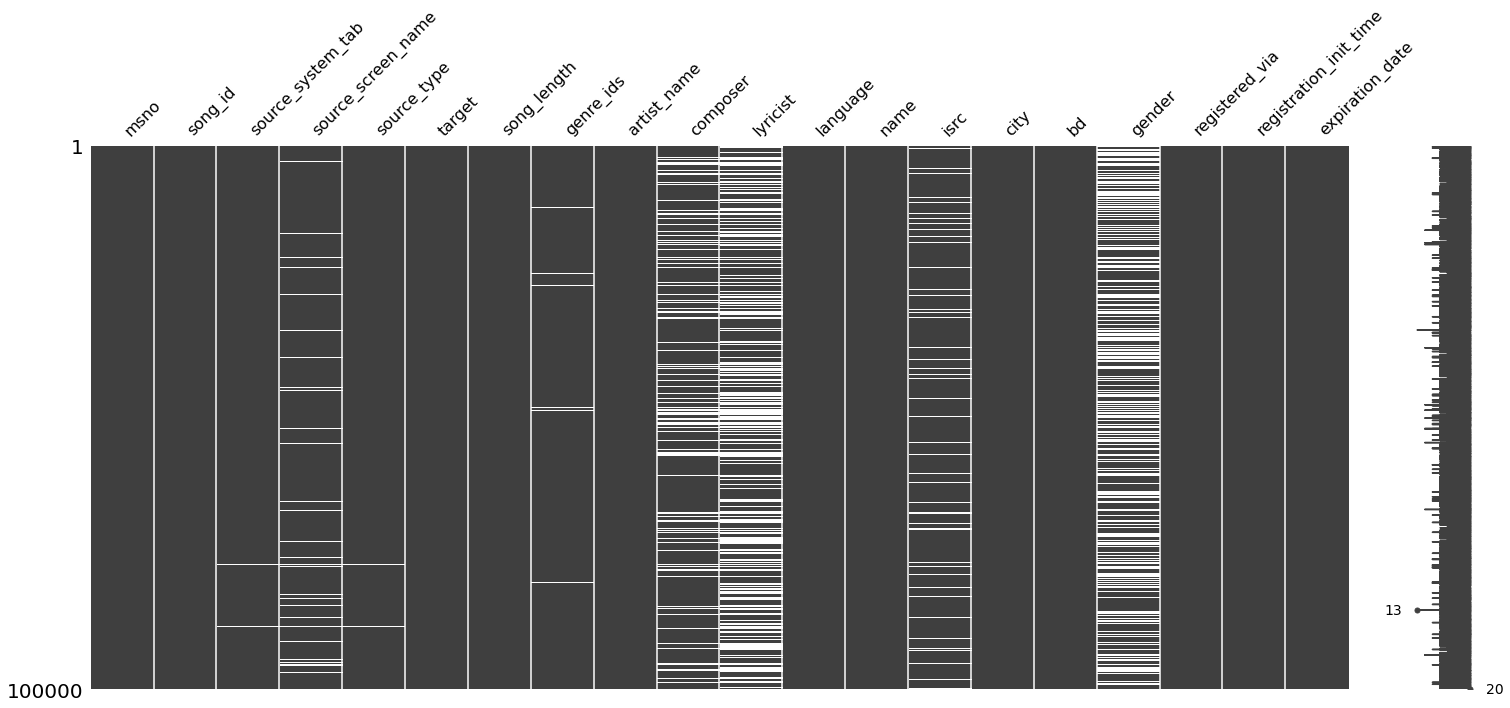

In [55]:
#查看null值分佈
msno.matrix(songs)

In [56]:
#將null值改為unknown
for i in songs.select_dtypes(include=['object']).columns:
    songs[i][songs[i].isnull()] = 'unknown'
songs = songs.fillna(value=0)

<AxesSubplot:>

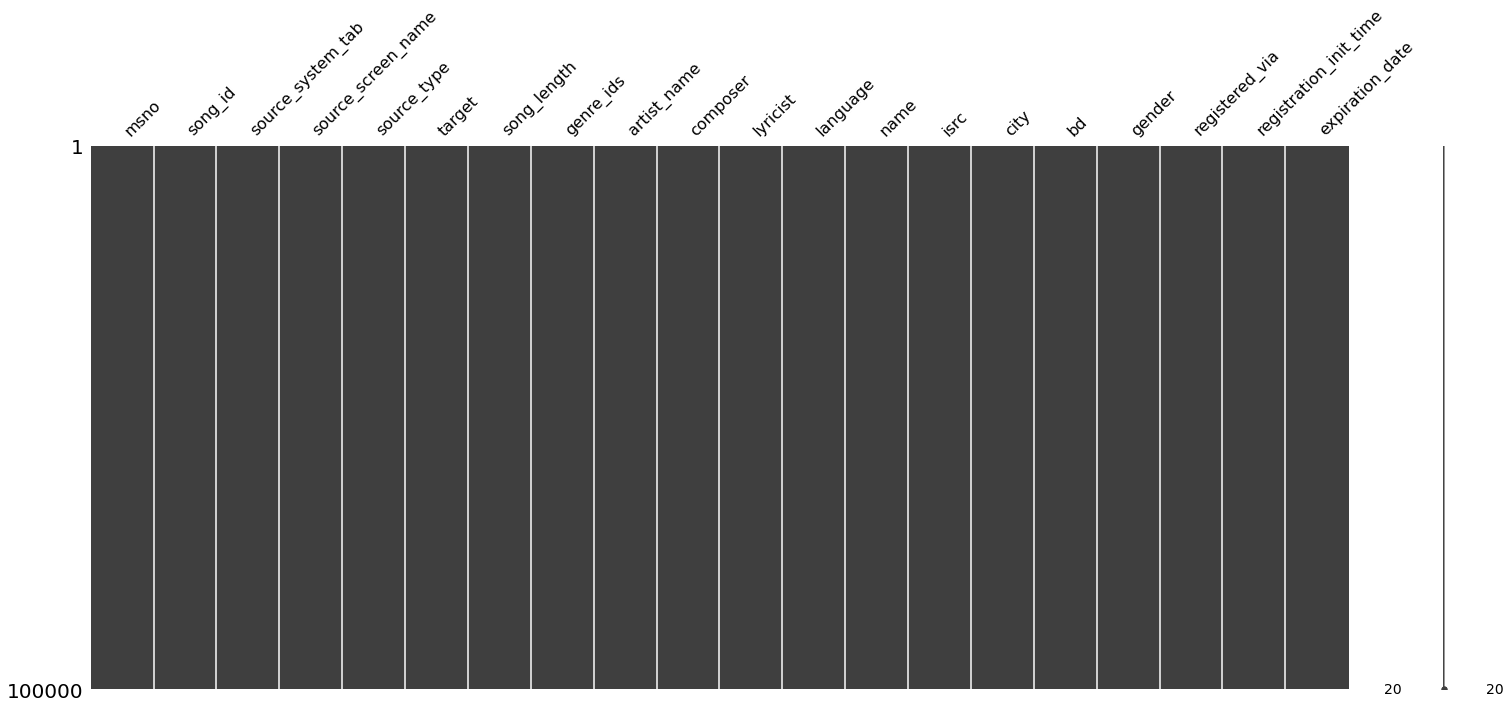

In [57]:
msno.matrix(songs)

In [58]:
# # registration_init_time
# songs.registration_init_time = pd.to_datetime(songs.registration_init_time, format='%Y%m%d', errors='ignore')
# songs['registration_init_time_year'] = songs['registration_init_time'].dt.year
# songs['registration_init_time_month'] = songs['registration_init_time'].dt.month
# songs['registration_init_time_day'] = songs['registration_init_time'].dt.day

# # expiration_date
# songs.expiration_date = pd.to_datetime(songs.expiration_date,  format='%Y%m%d', errors='ignore')
# songs['expiration_date_year'] = songs['expiration_date'].dt.year
# songs['expiration_date_month'] = songs['expiration_date'].dt.month
# songs['expiration_date_day'] = songs['expiration_date'].dt.day

In [59]:
# songs.head()

In [60]:
#大部分模型都是運用數學運算，因此必須運用Label Encoding將資料轉成數字型態
label_encoder = LabelEncoder()
one_hot = OneHotEncoder()

for i in songs.columns :
    songs[i] = label_encoder.fit_transform(songs[i])
songs.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,1647,6022,1,6,5,1,3514,94,424,1615,3159,9,3900,3293,0,1,2,2,1176,328
1,3471,18027,3,7,4,1,8946,28,3757,7664,3159,9,6186,18561,11,14,0,3,974,304
2,3471,9744,3,7,4,1,4973,28,2550,5137,3159,9,4359,21796,11,14,0,3,974,304
3,3471,1868,3,7,4,1,7194,1,3231,4202,3159,0,2685,3322,11,14,0,3,974,304
4,1647,2688,1,6,5,1,2330,0,561,970,3159,9,9286,8761,0,1,2,2,1176,328


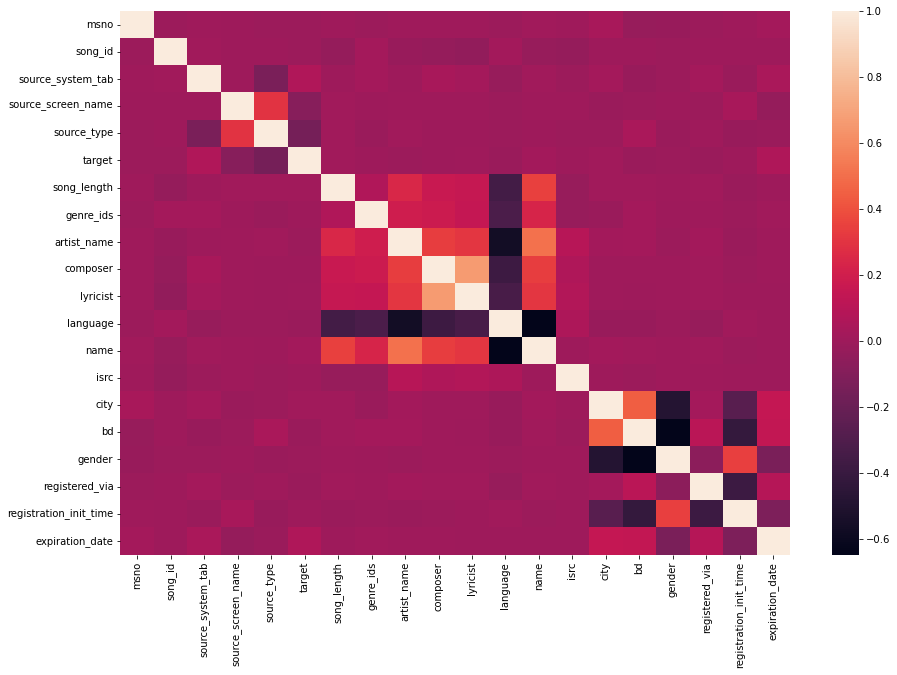

In [61]:
# Сorrelation matrix
#查看相關係數
plt.figure(figsize=[15,10])
sns.heatmap(songs.corr())
plt.show()

In [62]:
#訓練模型
X = songs.drop('target', axis = 1)
y = songs.target
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [63]:
train_set = lgbm.Dataset(X_train , Y_train)
print(X_val.index)

Int64Index([ 3582, 60498, 53227, 21333,  3885, 51521, 84261, 10685, 59948,
            41032,
            ...
            97171, 31446, 17129, 20296, 52695, 26543, 85764, 87585, 32519,
            18831],
           dtype='int64', length=25000)


In [64]:
print(Y_val.index)

Int64Index([ 3582, 60498, 53227, 21333,  3885, 51521, 84261, 10685, 59948,
            41032,
            ...
            97171, 31446, 17129, 20296, 52695, 26543, 85764, 87585, 32519,
            18831],
           dtype='int64', length=25000)


In [65]:
params = {
        'objective': 'binary',# 目標函數
        'metric': 'binary_logloss',
        'boosting': 'gbdt',# 設置提升類型
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 10,
        'num_rounds': 200,
        'metric' : 'auc'
    }

%time model_f1 = lgbm.train(params, train_set=train_set,  valid_sets=train_set, verbose_eval=5)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[5]	training's auc: 0.808855
[10]	training's auc: 0.842569
[15]	training's auc: 0.865901
[20]	training's auc: 0.883498
[25]	training's auc: 0.895074
[30]	training's auc: 0.904479
[35]	training's auc: 0.91158
[40]	training's auc: 0.920053
[45]	training's auc: 0.928524
[50]	training's auc: 0.935416
[55]	training's auc: 0.940202
[60]	training's auc: 0.945805
[65]	training's auc: 0.949818
[70]	training's auc: 0.953764
[75]	training's auc: 0.957349
[80]	training's auc: 0.960411
[85]	training's auc: 0.963598
[90]	training's auc: 0.966489
[95]	training's auc: 0.96902
[100]	training's auc: 0.971541
[105]	training's auc: 0.973642
[110]	training's auc: 0.975539
[115]	training's auc: 0.97713
[120]	training's auc: 0.978802
[125]	training's auc: 0.980665
[130]	training's au

In [66]:
pred_test = model_f1.predict(X_val)
print('Saving Predictions')
sub = pd.DataFrame()
sub['id'] = Y_val.index
sub['target'] = pred_test
sub.to_csv('2st_submission.csv' , index = False , float_format ='%.5f' )

Saving Predictions


In [67]:
sub.head()

,id,target
0,3582,0.620145
1,60498,0.931869
2,53227,0.257085
3,21333,0.679414
4,3885,0.421357


In [69]:
print('The rmse of prediction is:', mean_squared_error(Y_val, pred_test) ** 0.5)  # 計算真實值和預測值之間的均方根誤差

The rmse of prediction is: 0.3438193572056293


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [21]:
# def model_with(model_name, X_train, X_val, y_train, y_val) :
#     print("==================================================")
#     print("Modeling with :", model_name)
#     print()
        
#     if model_name == "Random Forest Classifier" :
#         model = RandomForestClassifier(
#             n_estimators=1000, 
#         )
#     elif model_name == "Extra Trees Classifier" :
#         model = ExtraTreesClassifier(
#             n_estimators=1000, 
#         )
#     elif model_name == "LightGBM Classifier" :
#         model = lgbm.LGBMClassifier(
#             n_estimators=1000, 
#         )
#     elif model_name == "XGBoost Classifier" :
#         model = xgb.XGBClassifier(
#             n_estimators=1000, 
#         )
#     elif model_name == "CatBoost Classifier" :
#         model = cb.CatBoostClassifier(
#             n_estimators=1000, 
#             verbose=0
#         )
#     else :
#         print("Model not found in function.")
        
#     model.fit(X_train, y_train)
    
#     val_pred = model.predict(X_val)
#     print(classification_report(y_val, val_pred))
#     print()
#     print("Accuracy :", accuracy_score(y_val, val_pred))
#     print("ROC :", roc_auc_score(y_val, val_pred))
    
#     print("==================================================")
#     print()

In [34]:
# models = ["Random Forest Classifier", "Extra Trees Classifier", "LightGBM Classifier", "XGBoost Classifier", "CatBoost Classifier"]
# for i in models :
#     model_with(i, X_train, X_val, y_train, y_val)

Modeling with : Random Forest Classifier

              precision    recall  f1-score   support

           0       0.76      0.57      0.65      6176
           1       0.87      0.94      0.90     18824

    accuracy                           0.85     25000
   macro avg       0.82      0.75      0.78     25000
weighted avg       0.84      0.85      0.84     25000


Accuracy : 0.849
ROC : 0.7538914809998921

Modeling with : Extra Trees Classifier

              precision    recall  f1-score   support

           0       0.74      0.59      0.66      6176
           1       0.87      0.93      0.90     18824

    accuracy                           0.85     25000
   macro avg       0.81      0.76      0.78     25000
weighted avg       0.84      0.85      0.84     25000


Accuracy : 0.84792
ROC : 0.7622041658317351

Modeling with : LightGBM Classifier

              precision    recall  f1-score   support

           0       0.75      0.53      0.63      6176
           1       0.86     

In [35]:
# rf = RandomForestClassifier(
#         n_estimators = 1000,
#         class_weight={0: 1.0050505050505052, 1: 0.9949494949494948}
# )

# rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.0050505050505052,
                                     1: 0.9949494949494948},
                       n_estimators=1000)

In [19]:
# val_pred = rf.predict(X_val)
# print("Accuracy :", accuracy_score(y_val, val_pred))

# sub = pd.DataFrame()
# sub['y_val'] = y_val
# sub['val_pred'] = val_pred
# sub.to_csv('1st_submission.csv' , index = False , float_format ='%.5f' )
# sub.head()